In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [96]:
df = pd.read_csv('gym_data.csv')
df = df.drop(['Unnamed: 12','Row'],axis=1)

Данные

Row – (int) индекс строки данных

Registration – (int) уникальный номер клиента

Zipcode – (int) индекс клиента

Age – (int) возраст

Partner_company – (0/1) продан ли абонемент по партнерской программе

Friend_promo – (0/1) продан ли абонемент по рекомендации друга

Contract_period – (int) продолжительность подписки в месяцах

Lifetime – (int) продожительность истории посещений

Class_registration_weekly – (ﬂoat) среднее число занятий в неделю

Avg_additional_charges_total – (ﬂoat) средняя плата за дополнительные услуги

Cancellation_freq – (ﬂoat) (ﬂoat) среднее число отмен и пропусков занятий

Exited – (0/1) анулирован ли абонемент

In [97]:
df

,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,2000159,57328,37,0,1,6,10,1.06,134.200000,0.01,0
1,2000235,29941,32,0,1,12,7,1.54,177.600000,0.07,0
2,2000297,57328,29,0,1,6,5,2.15,205.000000,0.28,0
3,2000435,29941,76,1,0,6,5,3.10,220.666667,0.39,0
4,2000774,29941,24,1,0,1,3,1.00,142.040000,0.12,1
...,...,...,...,...,...,...,...,...,...,...,...
8095,2999305,57328,46,1,0,1,6,2.05,188.460000,0.07,0
8096,2999322,29941,22,0,1,12,2,1.59,226.333333,0.12,0
8097,2999324,29941,22,0,1,1,8,2.53,211.333333,0.00,0
8098,2999660,29941,33,1,0,12,3,2.56,113.730000,0.00,0


In [98]:
X = df.drop(['Exited'],axis=1)
y = df['Exited'].values

In [29]:
df.Exited.mean()

0.24481481481481482

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

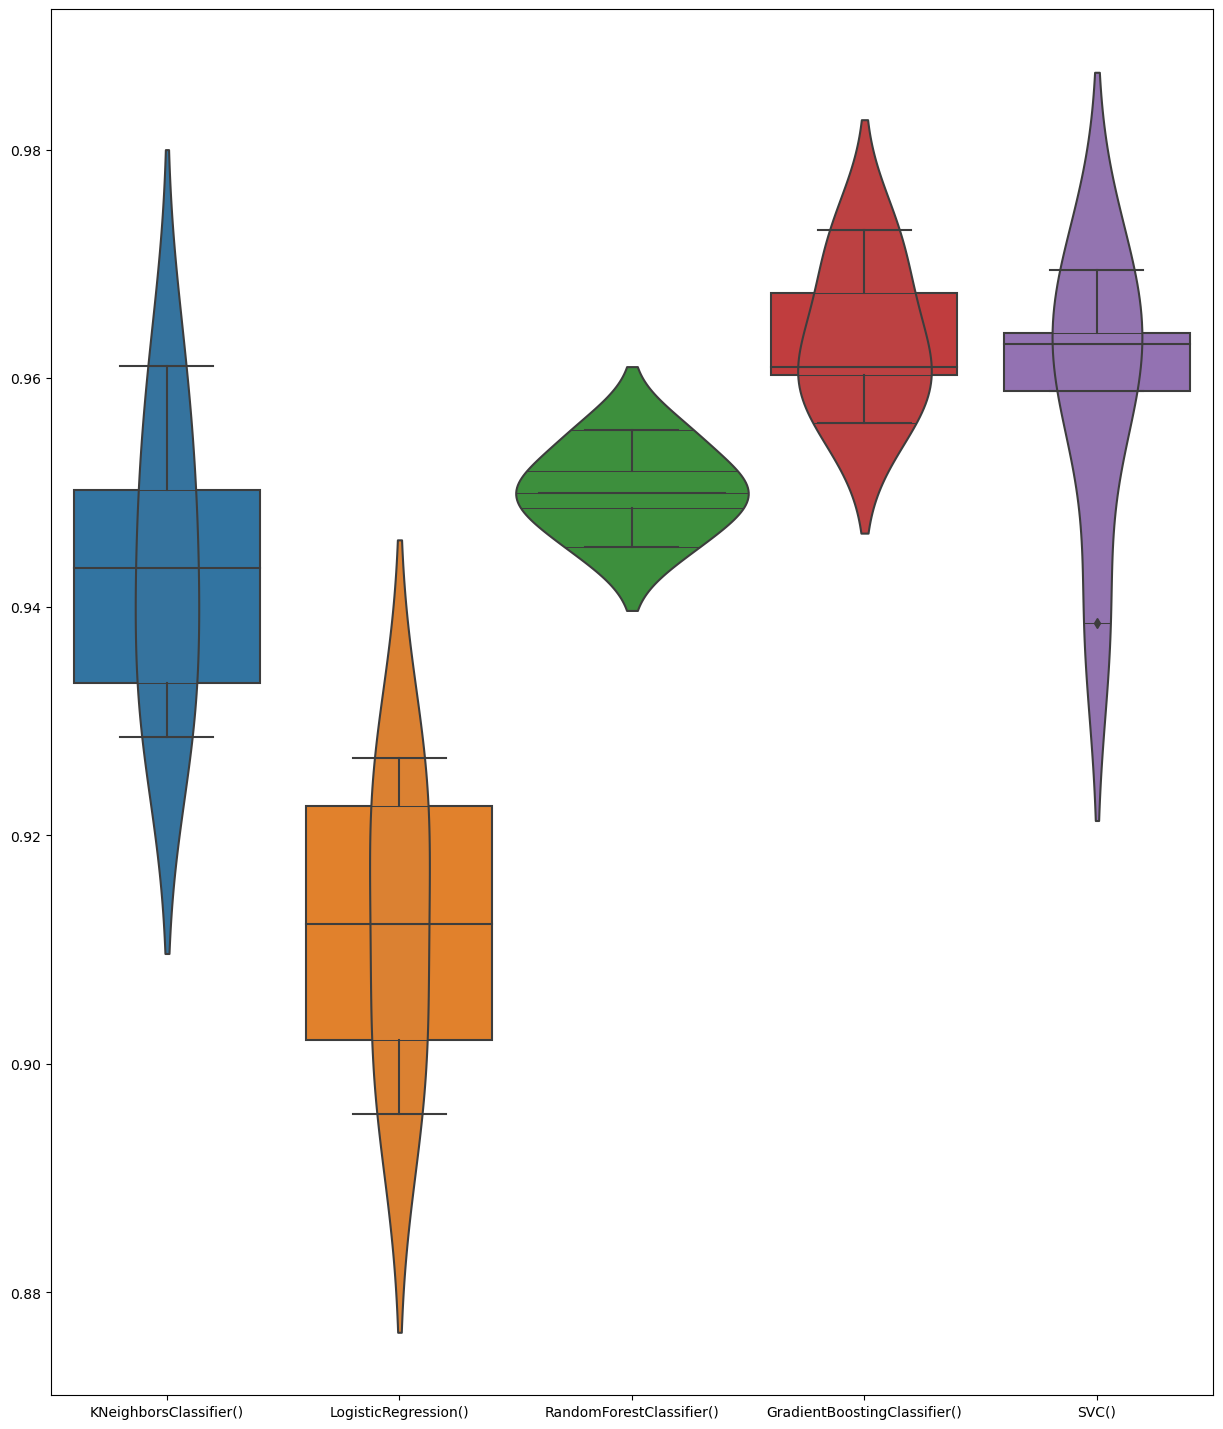

In [65]:
clf_list = [KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC() ]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', StandardScaler()),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=StratifiedKFold(5), scoring = 'f1')
    cv_list.append(cv_results['test_score'])
cv_list

cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

# Делаем самолетики
plt.figure(figsize=(15, 18))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

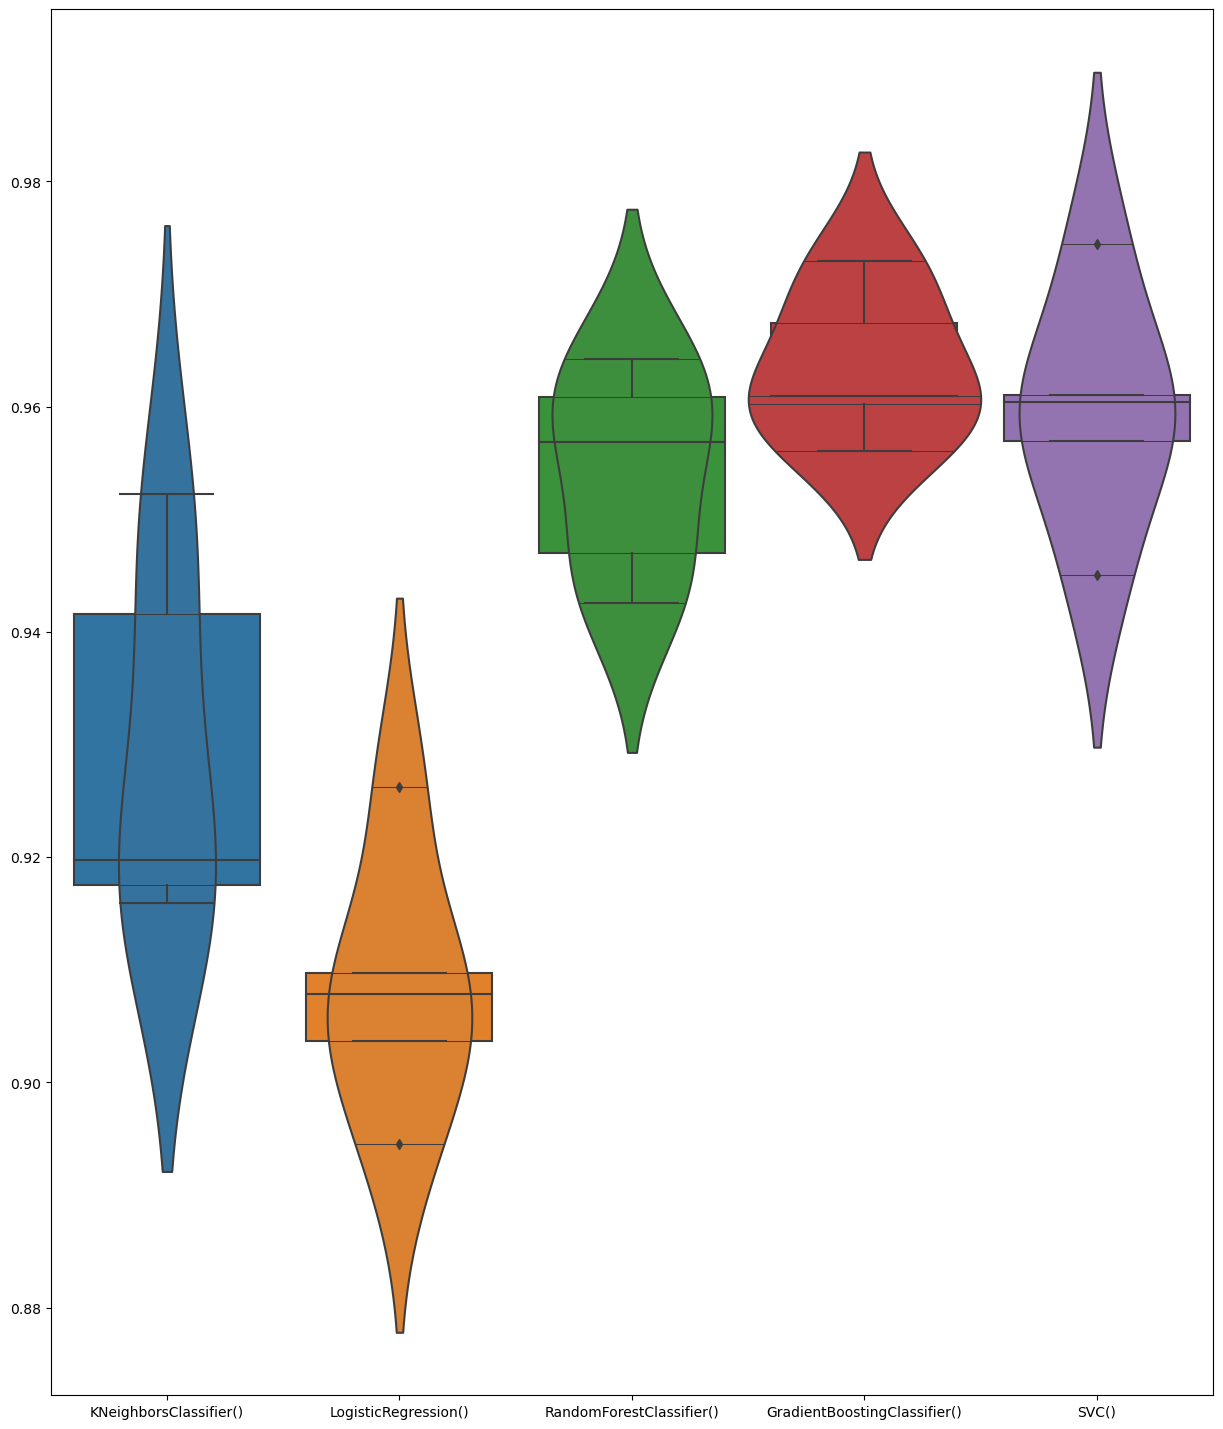

In [66]:
clf_list = [KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC() ]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', MinMaxScaler()),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=StratifiedKFold(5), scoring = 'f1')
    cv_list.append(cv_results['test_score'])
cv_list

cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

# Делаем самолетики
plt.figure(figsize=(15, 18))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [71]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', StandardScaler()),
                ('classifier', GradientBoostingClassifier())])

n_estimators  = np.arange(100,500,50)
min_samples_leaf = [1,3,5,7]#,3,5,7,9,11]
learning_rate = [0.01,0.2]#np.arange(0.01,0.2,0.02)
subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [StandardScaler()],
    'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': n_estimators,
     'classifier__min_samples_leaf': min_samples_leaf,
     'classifier__learning_rate': learning_rate,
      'classifier__subsample': subsample
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1, scoring = 'f1') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [GradientBoostingClassifier(learning_rate=0.2,
                                                                    n_estimators=250,
                                                                    subsample=1)],
                          'classifier__learning_rate': [0.01, 0.2],
                          'classifier__min_samples_leaf': [1, 3, 5, 7],
                          'classifier__n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
                          'classifier__subsample': [0.1, 0.5, 1],
                          'preprocessing': [StandardScaler()]}],
             return_train_score=True, scoring='f1')

<Axes: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__n_estimators'>

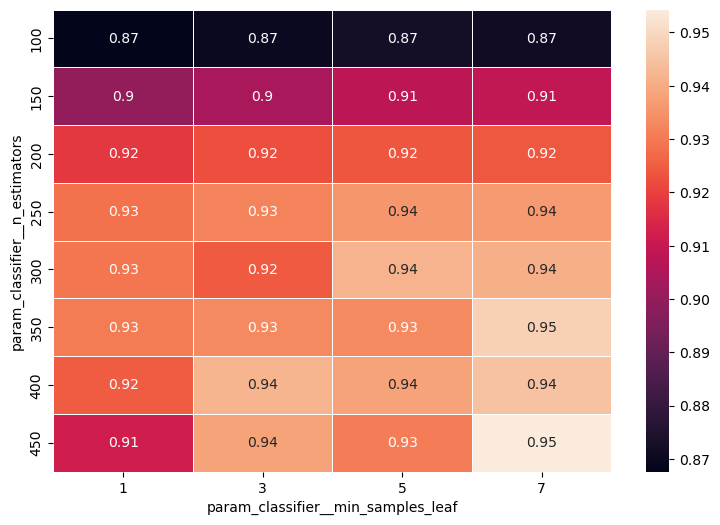

In [72]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [77]:
grid.best_estimator_

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, n_estimators=250,
                                            subsample=1))])

In [100]:
pipe_final = Pipeline([('preprocessing', StandardScaler()),
('classifier', GradientBoostingClassifier(learning_rate=0.2, n_estimators=250,
                                            subsample=1))])
pipe_final.fit(X_train, y_train)
y_predict = pipe_final.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1529
           1       0.94      0.93      0.93       496

    accuracy                           0.97      2025
   macro avg       0.96      0.95      0.96      2025
weighted avg       0.97      0.97      0.97      2025



In [101]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict)

0.9655172413793104

In [108]:
final = Pipeline([('preprocessing', StandardScaler()),
('classifier', GradientBoostingClassifier(learning_rate=0.2, n_estimators=250,
                                            subsample=1))])
final.fit(X, y)
y_predict = final.predict(X_test_final2)


In [113]:
df

,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,2000159,57328,37,0,1,6,10,1.06,134.200000,0.01,0
1,2000235,29941,32,0,1,12,7,1.54,177.600000,0.07,0
2,2000297,57328,29,0,1,6,5,2.15,205.000000,0.28,0
3,2000435,29941,76,1,0,6,5,3.10,220.666667,0.39,0
4,2000774,29941,24,1,0,1,3,1.00,142.040000,0.12,1
...,...,...,...,...,...,...,...,...,...,...,...
8095,2999305,57328,46,1,0,1,6,2.05,188.460000,0.07,0
8096,2999322,29941,22,0,1,12,2,1.59,226.333333,0.12,0
8097,2999324,29941,22,0,1,1,8,2.53,211.333333,0.00,0
8098,2999660,29941,33,1,0,12,3,2.56,113.730000,0.00,0


In [114]:
X_test_final['Exited'] = y_predict

In [ ]:
y_predict

In [107]:
X_test_final2 = X_test_final.drop(['Row'],axis=1)

In [126]:
X_test_final.to_csv('X_test_full.csv')

In [18]:
df2 = pd.read_csv('gym_test.csv')

In [25]:
X_test_final = df2.drop(['Exited'],axis=1)

In [102]:
X_test_final

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq
0,1001,2006682,29941,36,0,1,6,2,0.72,225.666667,0.01
1,1002,2008504,57328,37,1,0,12,8,1.29,166.666667,0.11
2,1003,2020638,33726,50,1,1,1,2,1.18,101.430000,0.12
3,1004,2021568,29941,38,0,1,12,5,0.13,215.000000,0.00
4,1005,2028557,33726,28,0,1,12,11,1.25,160.720000,0.13
...,...,...,...,...,...,...,...,...,...,...,...
195,1196,2975983,57328,34,1,0,1,3,3.29,188.000000,0.12
196,1197,2976461,57328,46,0,1,12,9,0.93,205.000000,0.00
197,1198,2985140,29941,33,0,0,1,2,1.52,65.450000,0.30
198,1199,2993255,29941,38,0,0,1,2,1.39,56.640000,0.20


In [81]:
n, m = map(int, input().split())
b = [int(input()) for _ in range(n)]

dp = [0] * n
dp[0] = 2

prev = [-1] * n

for i in range(1, n):
    if b[i] == b[i-1]:
        dp[i] = dp[i-1]
    else:
        for j in range(i):
            if b[i] != b[j]:
                new_val = dp[j] + 2**(1-j) * 2**(1-i)
                if new_val > dp[i]:
                    dp[i] = new_val
                    prev[i] = j

max_val = max(dp)
idx = dp.index(max_val)

res = []
while idx != -1:
    res.append(idx)
    idx = prev[idx]

print(*reversed(res))

10 2
1
1
1
0
0
1
0
1
1
1
0 3 5 6 7


In [82]:
n, m = map(int, input().split())
b = [int(input()) for _ in range(n)]

dp = [0] * n
dp[0] = 1

prev = [-1] * n

for i in range(1, n):
    if b[i] == b[i-1]:
        dp[i] = dp[i-1]
    else:
        for j in range(i):
            if b[i] != b[j]:
                new_val = dp[j] + 2**(i-j+1)
                if new_val > dp[i]:
                    dp[i] = new_val
                    prev[i] = j

max_val = max(dp)
idx = dp.index(max_val)

res = []
while idx != -1:
    res.append(idx)
    idx = prev[idx]

print(*reversed(res))

10 2
1
1
1
0
0
1
0
1
1
1
0 6 7


In [85]:
n, m = map(int, input().split())
b = [int(input()) for _ in range(n)]

dp = [0] * n
dp[0] = 1

prev = [-1] * n

for i in range(1, n):
    if b[i] == b[i-1]:
        dp[i] = dp[i-1]
    else:
        for j in range(i):
            if b[i] != b[j]:
                new_val = dp[j] + 2**(i-j+1)
                if new_val > dp[i]:
                    dp[i] = new_val
                    prev[i] = j

max_val = max(dp)
idx = dp.index(max_val)

res = []
while idx != -1:
    res.append(idx)
    idx = prev[idx]

res.sort() # сортируем список индексов в порядке возрастания релевантности

print(*reversed(res))

2 2
1
1
0


In [86]:
n, m = map(int, input().split())
b = [int(input()) for _ in range(n)]

dp = [0] * n
dp[0] = 1

prev = [-1] * n

for i in range(1, n):
    if b[i] == b[i-1]:
        dp[i] = dp[i-1]
    else:
        for j in range(i):
            if b[i] != b[j]:
                new_val = dp[j] + 2**(i-j+1)
                if new_val > dp[i]:
                    dp[i] = new_val
                    prev[i] = j

max_val = max(dp)
idx = dp.index(max_val)

res = []
while idx != -1:
    res.append(idx)
    idx = prev[idx]

res.sort(key=lambda x: (dp[x], -x)) # сортируем список индексов в порядке возрастания релевантности и убывания индекса

print(*reversed(res))

10 2
1
1
1
0
0
1
0
1
1
1
7 6 0


In [87]:
n, m = map(int, input().split())
b = [int(input()) for _ in range(n)]

dp = [0] * n
dp[0] = 1

prev = [-1] * n

for i in range(1, n):
    if b[i] == b[i-1]:
        dp[i] = dp[i-1]
    else:
        for j in range(i):
            if b[i] != b[j]:
                new_val = dp[j] + 2**(i-j+1)
                if new_val > dp[i]:
                    dp[i] = new_val
                    prev[i] = j

max_val = max(dp)
idx = dp.index(max_val)

res = []
while idx != -1:
    res.append(idx)
    idx = prev[idx]

res.sort(key=lambda x: (dp[x], x)) # сортируем список индексов в порядке возрастания релевантности и возрастания индекса

print(*reversed(res)) # выводим список индексов в обратном порядке

10 2
1
1
1
0
0
1
0
1
1
1
7 6 0


In [88]:
n, m = map(int, input().split())
b = [int(input()) for _ in range(n)]
r = [2**-i for i in range(n)]

# инициализируем массив dp значением -inf
dp = [[-float('inf') for _ in range(m)] for _ in range(n)]
for j in range(m):
    if b[0] != j:
        dp[0][j] = r[0]

for i in range(1, n):
    for j in range(m):
        if b[i] == j:
            continue
        for k in range(m):
            if k == j or b[i] == k:
                continue
            dp[i][j] = max(dp[i][j], dp[i-1][k])
        dp[i][j] += r[i] if b[i] != b[i-1] else 0

# найти максимальную релевантность среди всех последних элементов
max_rel = -float('inf')
last_type = -1
for j in range(m):
    if dp[n-1][j] > max_rel:
        max_rel = dp[n-1][j]
        last_type = j

# построить искомый список
res = [0] * n
res[n-1] = last_type
for i in range(n-1, 0, -1):
    for j in range(m):
        if b[i] == j or last_type == j:
            continue
        if dp[i-1][j] + (r[i] if b[i] != b[i-1] else 0) + dp[i][last_type] == max_rel:
            res[i-1] = j
            last_type = j
            break

print(" ".join(str(x) for x in res))

10 2
1
1
1
0
0
1
0
1
1
1
0 0 0 1 0 1 0 0 0 -1


In [89]:
n, m = map(int, input().split())
b = [int(input()) for _ in range(n)]

dp = [0] * n
dp[0] = 1

prev = [-1] * n

for i in range(1, n):
    if b[i] == b[i-1]:
        dp[i] = dp[i-1]
    else:
        for j in range(i):
            if b[i] != b[j]:
                new_val = dp[j] + 2**(i-j+1)
                if new_val > dp[i]:
                    dp[i] = new_val
                    prev[i] = j

max_val = max(dp)
idx = dp.index(max_val)

res = []
while idx != -1:
    res.append(idx)
    idx = prev[idx]

res.sort(key=lambda x: (dp[x], x))

print(*reversed(res))

10 2
1
1
1
0
0
1
0
1
1
1
7 6 0


In [120]:
n, m = map(int, input().split())
b = list(map(int, input().split()))

x = [0]  # начинаем со списка, содержащего только первый объект
prev_type = b[0]
prev_rel = 1  # релевантность первого объекта

for i in range(1, n):
    if b[i] != prev_type:  # тип объекта отличается от типа последнего объекта в списке x
        new_rel = prev_rel + 2**(-len(x)) * (2**(-i))  # вычисляем релевантность нового списка
        if new_rel > prev_rel:  # если новый список лучше, чем старый
            x.append(i)  # добавляем объект в список x
            prev_type = b[i]  # обновляем тип последнего объекта
            prev_rel = new_rel  # обновляем релевантность списка
    else:  # тип объекта совпадает с типом последнего объекта в списке x
        continue

# выводим номера объектов в итоговом списке
for i in x:
    print(i, end=' ')

10 2
1 1 1 0 0 1 0 1 1 1
0 3 5 6 7 

In [122]:
n, m = map(int, input().split())b = list(map(int, input().split()))
dp = [[-float('inf') if i > 0 else 0 for j in range(n)] for i in range(n+1)]
max_val = -float('inf')* max_idx = None
for i in range(1, n+1):
    for j in range(i-1, n):        for k in range(j-1, -1, -1):
            if b[k] != b[j]:                dp[i][j] = max(dp[i][j], dp[i-1][k] + 2**(-j) * 2**(k+1))
        if dp[i][j] > max_val:            max_val = dp[i][j]
            max_idx = j
res = []for i in range(max_idx, -1, -1):
    if len(res) == 0 or b[i] != b[res[-1]]:        res.append(i)
res.reverse()
print(*res)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)